## Lecture 8

#### Convexity

Definition: $f(x)$ is convex if for all $0 \le \alpha \le 1$, $f(\alpha x+(1-\alpha)y) \le \alpha f(x) + (1-\alpha) f(y)$

**Result 1**:
If $x^*$ is a local min of a convex function $f$, then $x^*$ is a global min of $f$ too.

$pf$: 
Let $y$ be a global min, let $x$ be a local min, then $f(y) < f(x)$, then $x^*$ cannot be a local min by definition.


**Result 2**:
Let $f(x)$ be convex, then if $g(x_0)=0$ of some $x_0$, then $x_0$ is a local/global min. <=> $g(x)=0$ is a necessary and sufficient condition for a convex function to have a local min.

**Case**: Least Squares

$$
f(x)=||Ax-b||_2^2 = \sum_i(b_i-a_i^Tx)^2
$$
$A$ has $m$ rows, $a_i^T$ is a row of $A$ ($i^{th}$row).

Solve LS <=> find $x$ to minimize $f(x)$

**How to solve LS?**
+ SVD
+ Normal EQS: $A^TAx=A^Tb$
+ QR factorization
+ LSQR
+ Gradient Descent (GD)
+ SGD
+ CGLS
+ LSMR
+ LSRV

For this case, use $g(x)=0$ to solve for $x$.
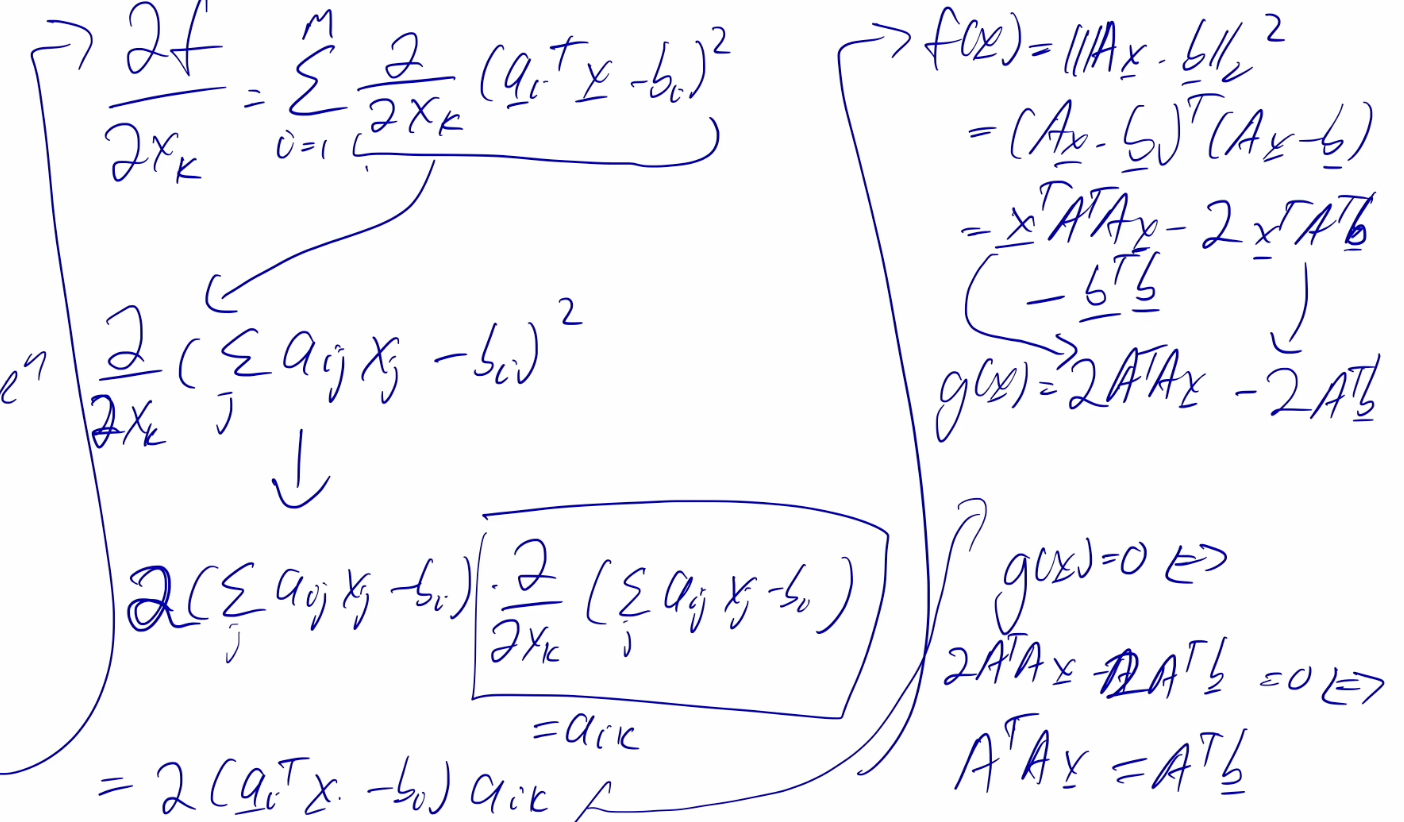

**Solving LS**
Solve $A^TAx=A^Tb$ to get $g(x)=0$
$$
\min_x ||Ax-b||_2^2
$$
(+) works for full rank $m \ge n$

#### Constrained LS

$$ 
\min ||b-Ax||, s.t. Cx=d 
$$
$A:m \times n$

$C:p \times n$



## Lecture 9

**CLS Constrained Least Squares**

$$
\min ||b-Ax||_2^2, s.t. Cx=d
$$

Let$C\in R^{m\times n}, m<n$, then $C$ has a null space.
$$
Null(C) = {y|Cy=0}
$$

Why is $Null(C)$ important?

If $Cx_C =d$ is any point that is feasible, then $(x_C+y)$ is also feasible, where $y\in Null(C)$

Actually, all feasible points can be written as
$$
x_c + y
$$
for $y \in Null(C)$

=> 
$$
CLS <=> \min ||b-A(x_c+y)||_2^2, s.t. y \in Null(C)
$$

if $C\in R^{m\times n}$ is full-rank, then $dim(Null(C)=n-m)$

Let $Z$ be a basis for $Null(C)$ => $y\in Null(C)$ <=> $y=Zf$ for some $f$, $Z \in R^{n \times (n-m)}$

CLS:
$$
min||b-A(x_C+Zf)||_2
$$

This is ordinary least square with no constraints!

2 ways to find $Z$:
+ take a QR decomposition of $A^T$
+ take a SVD decomposition of $A$

**QR decomposition**:

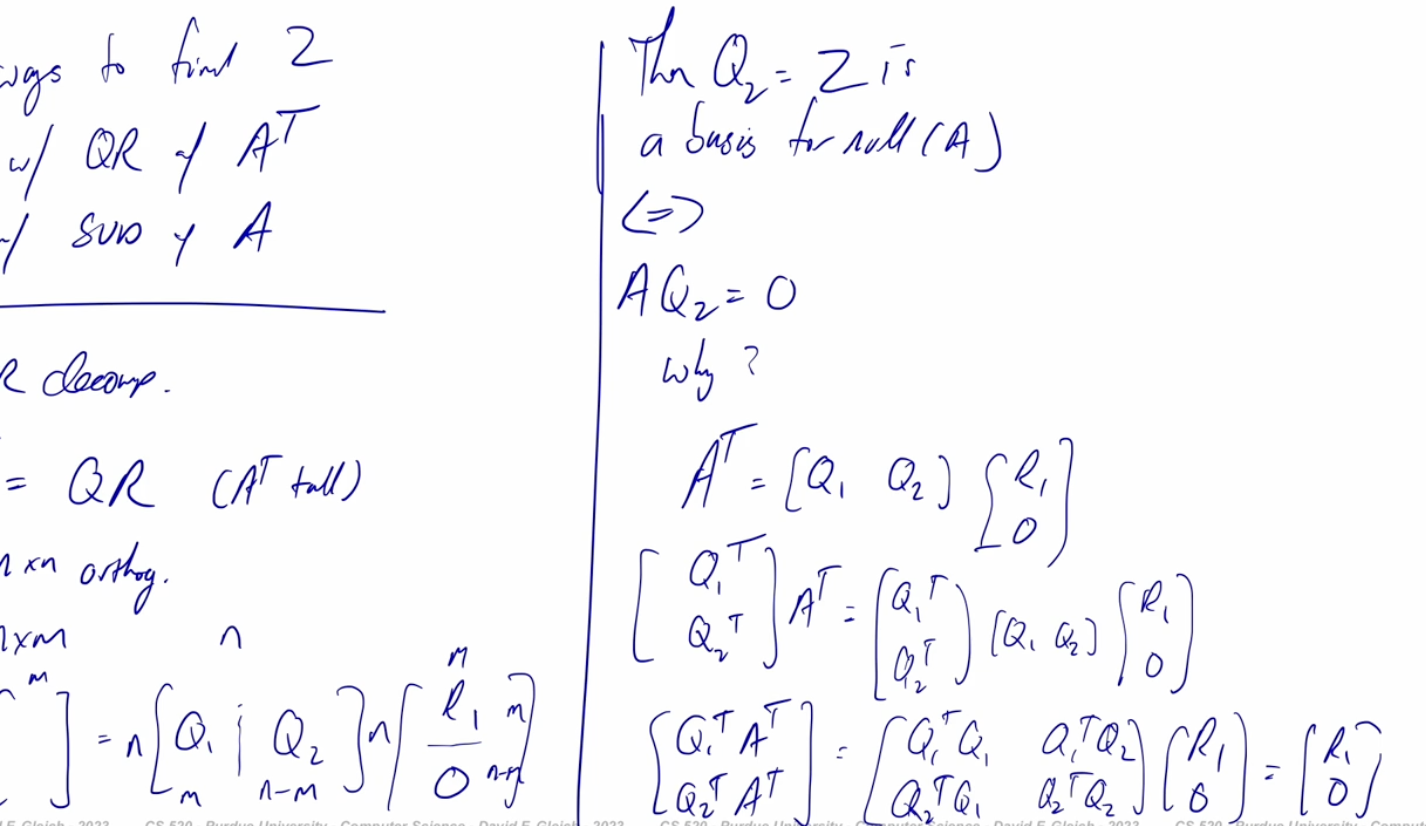

**SVD decomposition**:

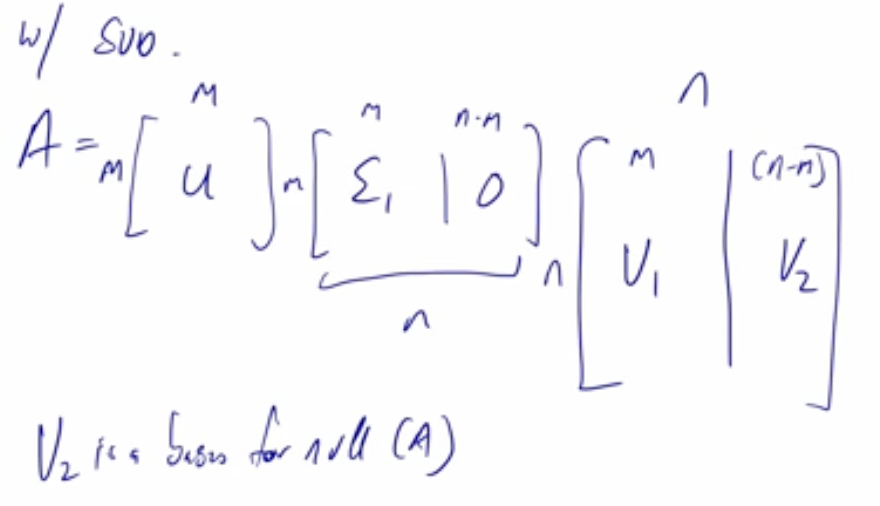

Now we can use QR to get $x_C$.

In CLS, we'd use $QR(C^T)$ to get $[Q_1:Q_2]$

$$
\begin{split}
C^T=QR \\
C=R^TQ^T \\
CX_c=d \\
=> R^TQ^TX_c = d
\end{split}
$$

**Algorithm for CLS**:

1. $QR(C^T)->Q_1,Q_2,R_1$
2. Compute $x_c = Q_1(R^{-1}d)$
3. solve $\min ||b-A(x_C+Q_2y)||_2$
4. Return $x_C+Q_2y$

The general idea for optimization problem:
$\min f(x)$, s.t. Ax=b$ (now $A$ is the constraint matrix!)

1. Find $x_C, s.t. Ax_C=b$
2. Find $Z, s.t. z is a basis for Null(A)$
3. Solve $\min_y f(x_c+2y)$ (y is unconstrained)
   
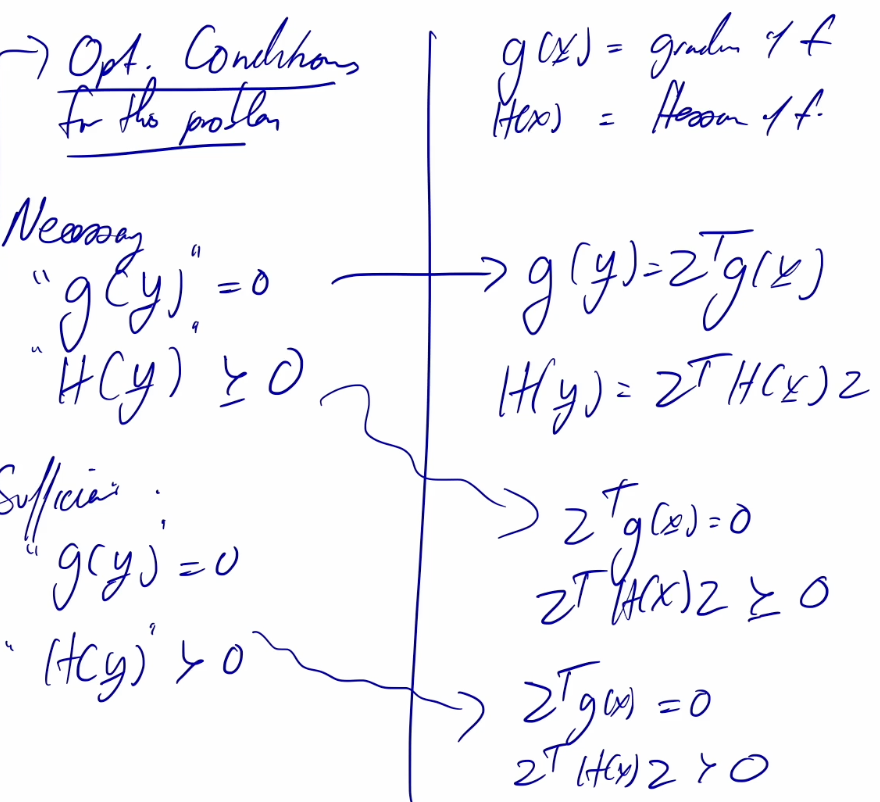

## Lecture 10

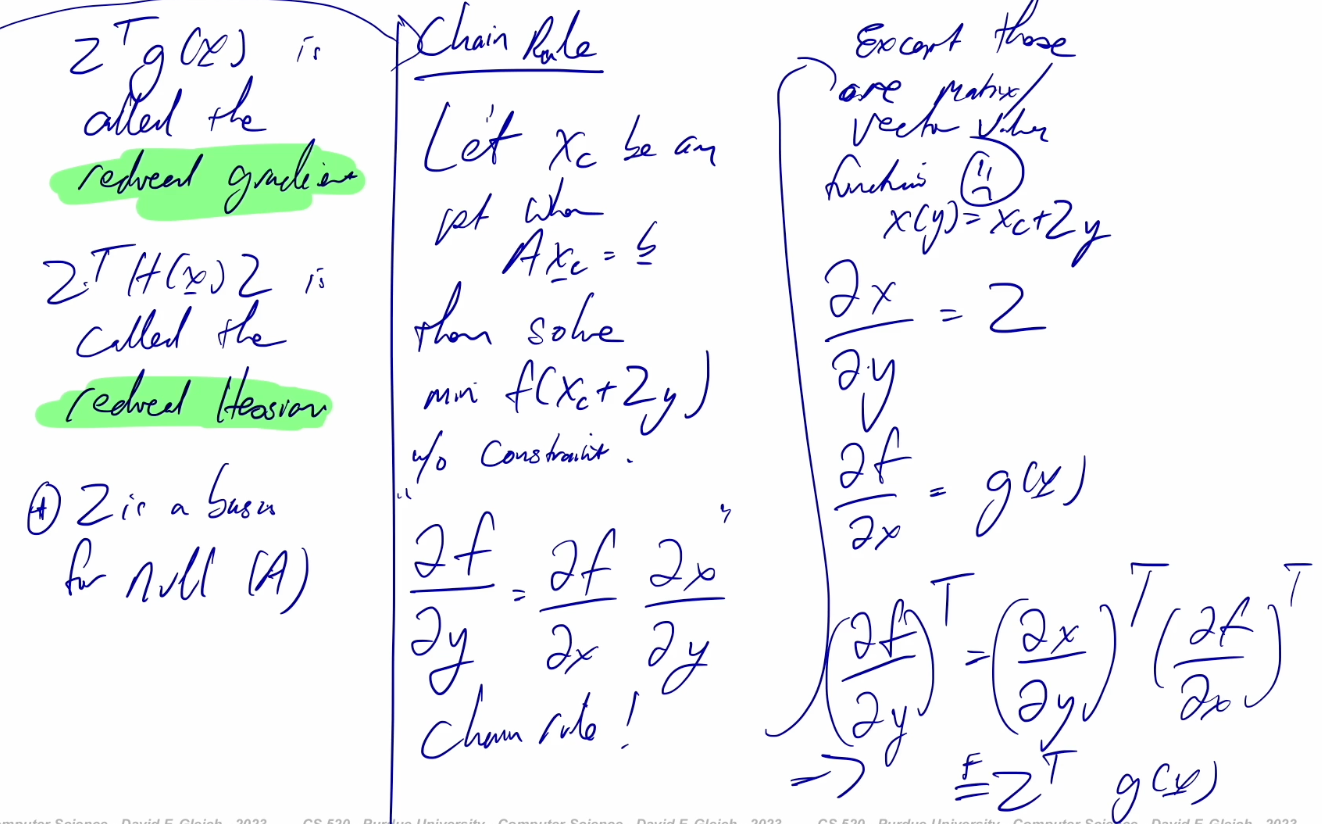

**Least Squares for sports ranking**

Our goal: estimate a stength for each team:

$$
\min \sum\{(s_i-s_j)-(p_i-p_j)\}^2, s.t. \sum s_i=1
$$

In [1]:
using LinearAlgebra, Plots, Random, SparseArrays

In [2]:
"""
conls
=====

Solve a constrained least squares problem 

    conls(A,b,B,d) -> x 

solves 

   minimize     ||b - Ax||_2
   subject to   Bx = d

when B is p-by-n, p < n, and rank(B) = p, by using the QR factorization
of B' to find a basis for the nullspace of B.
"""
function conls(A,b,B,d)
    m,n = size(A)
    p = size(B,1)
    
    @assert size(B,2) == n "incompatible dimensions for A and B"
    
    # Step 1, QR of B' to get the nullspace
    qrf = qr(B')
    R = qrf.R
    @assert all(diag(R) != 0) "B is not full-rank"
    
    Q = qrf.Q*Matrix(I,n,n) # this forms the full matrix Q. 
    Q1 = view(Q,:,1:p)     # view extracts a submatrix
    Q2 = view(Q,:,(p+1):n) 
    
    # form a solution
    xc = Q1*(R'\d)
    # solve the new LS problem
    y = (A*Q2)\(b-A*(xc))
    # recombine the solution
    x =xc + Q2*y
    return x
end

teams = ["duke","miami","unc","uva","vt"]
data = [ # team 1 team 2, team 1 pts, team 2 pts
    1 2  7 52 # duke played Miami and lost 7 to 52 
    1 3 21 24 # duke played unc and lost 21 to 24 
    1 4  7 38
    1 5  0 45
    2 3 34 16
    2 4 25 17
    2 5 27  7
    3 4  7  5
    3 5  3 30
    4 5 14 52
]
ngames = size(data,1)
nteams = length(teams)

G = zeros(ngames, nteams)
p = zeros(ngames, 1)

for g=1:ngames
    i = data[g,1]
    j = data[g,2]
    Pi = data[g,3]
    Pj = data[g,4]
  
    G[g,i] = 1
    G[g,j] = -1
    p[g] = Pi - Pj
end
s1 = conls(G,p,ones(1,nteams),[100.0])

5×1 Matrix{Float64}:
 -4.800000000000004
 38.2
 11.999999999999996
 16.599999999999998
 38.0

### The Lagrangian Perspective
$$
\min f(x), s.t. Ax=b
$$

The lagrangian function:
$$
L(x,\lambda;f)=f(x)-\lambda^T(Ax-b)
$$

Idea: stationary point of $L(x,\lambda)$ are extreme point of the original constraint problem.

Stationary points of $L(x,\lambda)$

$$
\begin{split}
\frac{\partial L}{\partial x}=0=g(x)-A^T\lambda \\
\frac{\partial L}{\partial \lambda}=0=Ax-b
\end{split}
$$

**Two equivalent conditions**:
$z^Tg(x)=0 <=> A^T\lambda=g(x)$

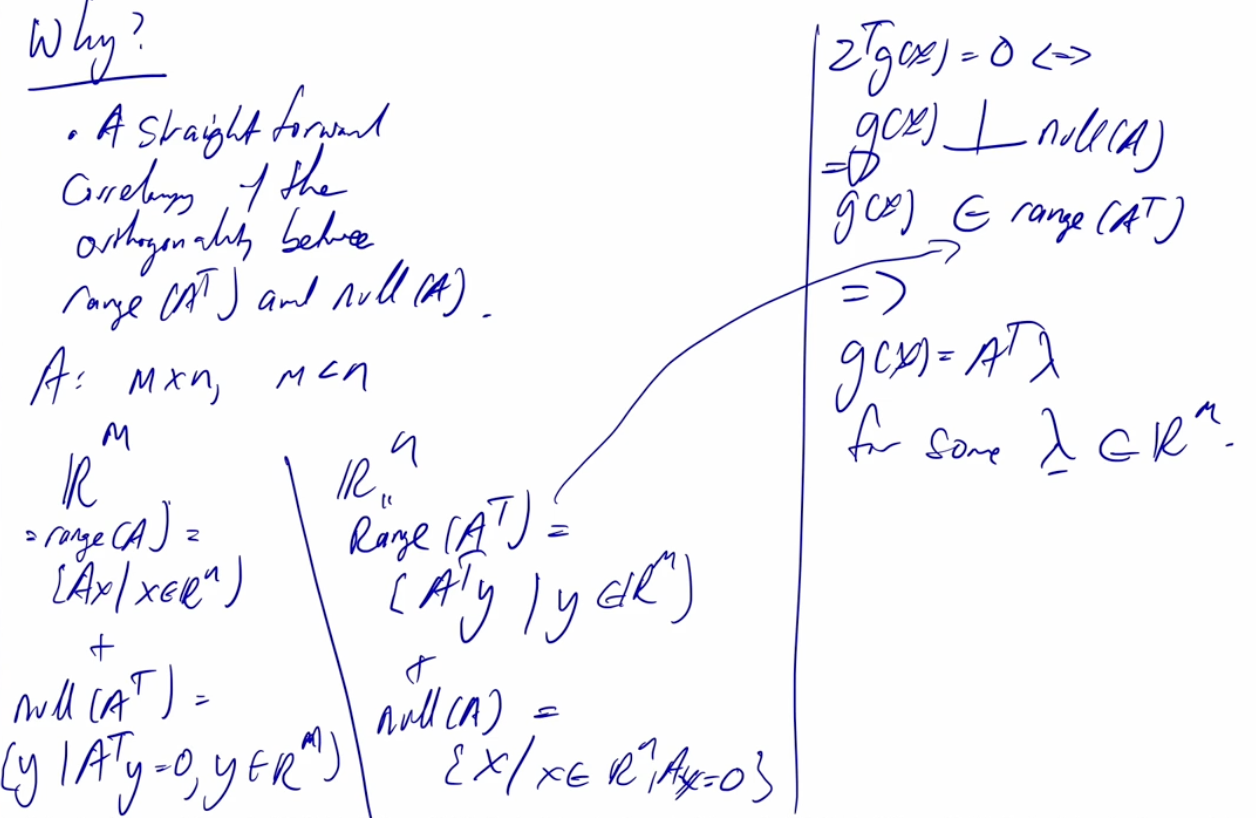

A straightforward cuolery of the orthogonality between $range(A^T)$ and $null(A)$.

Let's apply Lagragian Multiplier to CLS:
$$
L(x,\lambda;f)=\frac{1}{2}||b-Ax||_2^2-\lambda^T(Ax-b)
$$

$$
\begin{split}
\frac{\partial L}{\partial x}=A^TAx-A^Tb-C^T\lambda=0 \\
\frac{\partial L}{\partial \lambda}=d-Cx=0
\end{split}
$$

$$
\begin{bmatrix}
A^TA & C^T \\
C & 0
\end{bmatrix}\begin{bmatrix}x \\ -\lambda \end{bmatrix}=\begin{bmatrix}A^Tb \\ d \end{bmatrix}
$$



In [3]:
"""
conls_lagrange
=====

Solve a constrained least squares problem 

    conls(A,b,B,d) -> x, lam

solves 

   minimize     ||b - Ax||_2
   subject to   Bx = d

when B is p-by-n, p < n, and rank(B) = p, by using the augmented
system of normal equations

   [ A'*A  B' ] [  x  ] = [ A'*b]
   [ B     0  ] [ lam ] = [  d  ]

and returns both x and the lagrange multipliers
"""
function conls_lagrange(A,b,B,d)
    m,n = size(A)
    p = size(B,1)
    
    @assert size(B,2) == n "incompatible dimensions for A and B"
    
    # Step 1, form the block system
    M = [A'*A B'; B zeros(p,p) ]

    # Step 2, solve
    z = M\[A'*b; d]

    # Step 3, extract 
    x = z[1:n]
    lam = z[n+1:end]
    
    return x, lam
end

conls_lagrange

In [4]:
s2,lam = conls_lagrange(G,p,ones(1,nteams),[100.0])

([-4.800000000000001, 38.2, 11.999999999999998, 16.6, 38.0], [0.0])